In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons

from sklearn.metrics import mean_squared_error

## Loading data

In [2]:
student_id = 994023037

In [3]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=student_id)
X_blobs, y_blobs = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2.75, random_state=student_id)

In [4]:
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2)
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=0.2)

In [5]:
def plot_helper(X, y, **kwargs):
    sns.scatterplot(
    x=X[: ,0], y=X[:, 1],
    c=y,
    cmap="vlag",
    **kwargs
);

''

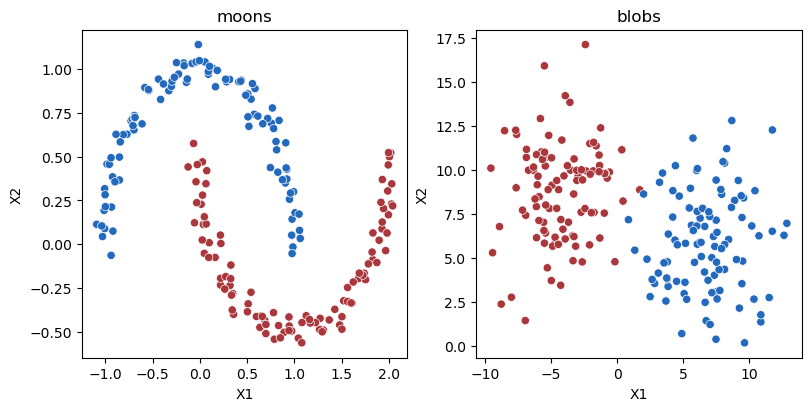

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout="constrained")
plot_helper(X_moons, y_moons, ax=ax[0])
plot_helper(X_blobs, y_blobs, ax=ax[1])
ax[0].set_title("moons")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("X2")

ax[1].set_title("blobs")
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")
;

___

## Modeling

In [7]:
# activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

In [8]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        
        self.error_values = []

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)  
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        output = sigmoid(self.z2)

        return output
    
    def backward(self, X, y, output):
        # backpropagation
        error = (y - output)
        delta_output = error * sigmoid_derivative(output)
        
        error_hidden = np.dot(delta_output, self.W2.T)
        delta_hidden = error_hidden * relu_derivative(self.a1) 
        
        # update weights and biases
        self.W2 += np.dot(self.a1.T, delta_output)
        self.b2 += np.sum(delta_output, axis=0, keepdims=True)
        self.W1 += np.dot(X.T, delta_hidden)
        self.b1 += np.sum(delta_hidden, axis=0, keepdims=True)

    @staticmethod
    def accuracy(y_true, y_pred):
        correct = np.sum(y_true.reshape(-1, 1) == y_pred.reshape(-1, 1))
        total = len(y_true)
        return correct / total
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            
            # update weights and biases
            self.W1 -= learning_rate * self.W1
            self.b1 -= learning_rate * self.b1
            self.W2 -= learning_rate * self.W2
            self.b2 -= learning_rate * self.b2

            if epoch % 10 == 0 :
                mse = mean_squared_error(y, output)
                self.error_values.append(mse)
                print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")
            
    def predict(self, X):
        output = self.forward(X)
        predictions = np.round(output)
        return predictions

## prediction

In [9]:
# X_train, y_train = X_train_blobs, y_train_blobs
EPOCH = 100

mlp_blobs = MLP(input_size=2, hidden_size=8, output_size=1)
mlp_blobs.train(X_train_blobs, y_train_blobs.reshape(-1, 1), epochs=EPOCH, learning_rate=0.01)

Epoch 1/100, MSE: 0.4765
Epoch 11/100, MSE: 0.3100
Epoch 21/100, MSE: 0.0125
Epoch 31/100, MSE: 0.0125
Epoch 41/100, MSE: 0.0125
Epoch 51/100, MSE: 0.0250
Epoch 61/100, MSE: 0.0118
Epoch 71/100, MSE: 0.0063
Epoch 81/100, MSE: 0.0064
Epoch 91/100, MSE: 0.0073


In [10]:
EPOCH = 100
# X_train, y_train = X_train_moons, y_train_moons
mlp_moons = MLP(input_size=2, hidden_size=8, output_size=1)
mlp_moons.train(X_train_moons, y_train_moons.reshape(-1, 1), epochs=EPOCH, learning_rate=0.01)

Epoch 1/100, MSE: 0.3234
Epoch 11/100, MSE: 0.2062
Epoch 21/100, MSE: 0.1993
Epoch 31/100, MSE: 0.1050
Epoch 41/100, MSE: 0.1167
Epoch 51/100, MSE: 0.0985
Epoch 61/100, MSE: 0.0786
Epoch 71/100, MSE: 0.0980
Epoch 81/100, MSE: 0.0896
Epoch 91/100, MSE: 0.0935


## accuracy of the model

Train data

In [11]:
predictions_blobs = mlp_blobs.predict(X_train_blobs)
predictions_moons = mlp_moons.predict(X_train_moons)

In [12]:
mlp_moons.accuracy(y_train_moons, predictions_moons)

0.9

In [13]:
mlp_blobs.accuracy(y_train_blobs, predictions_blobs)

0.9875

Test Data

In [14]:
test_predictions_blobs = mlp_blobs.predict(X_test_blobs)
test_predictions_moons = mlp_moons.predict(X_test_moons)

In [15]:
mlp_blobs.accuracy(y_test_blobs, test_predictions_blobs)

0.975

In [16]:
mlp_moons.accuracy(y_test_moons, test_predictions_moons)


0.775

## visualization of the predications

#### on the train data

''

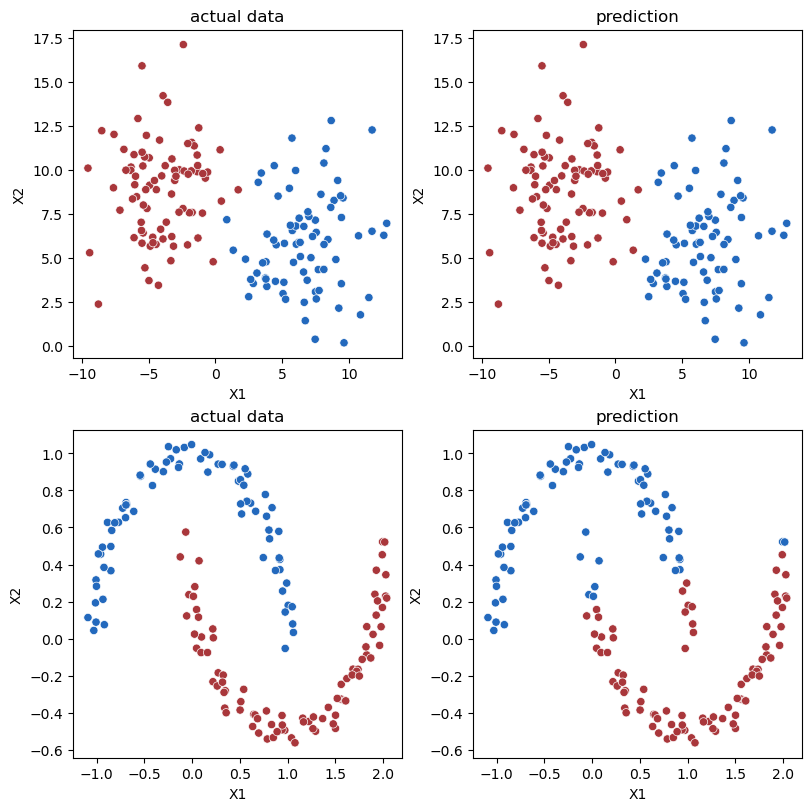

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), layout="constrained")
plot_helper(X_train_blobs, y_train_blobs, ax=ax[0, 0])
plot_helper(X_train_blobs, predictions_blobs, ax=ax[0, 1])
ax[0, 0].set_title("actual data")
ax[0, 0].set_xlabel("X1")
ax[0, 0].set_ylabel("X2")

ax[0, 1].set_title("prediction")
ax[0, 1].set_xlabel("X1")
ax[0, 1].set_ylabel("X2")

plot_helper(X_train_moons, y_train_moons, ax=ax[1, 0])
plot_helper(X_train_moons, predictions_moons, ax=ax[1, 1])
ax[1, 0].set_title("actual data")
ax[1, 0].set_xlabel("X1")
ax[1, 0].set_ylabel("X2")

ax[1, 1].set_title("prediction")
ax[1, 1].set_xlabel("X1")
ax[1, 1].set_ylabel("X2")
;

#### On the test data

''

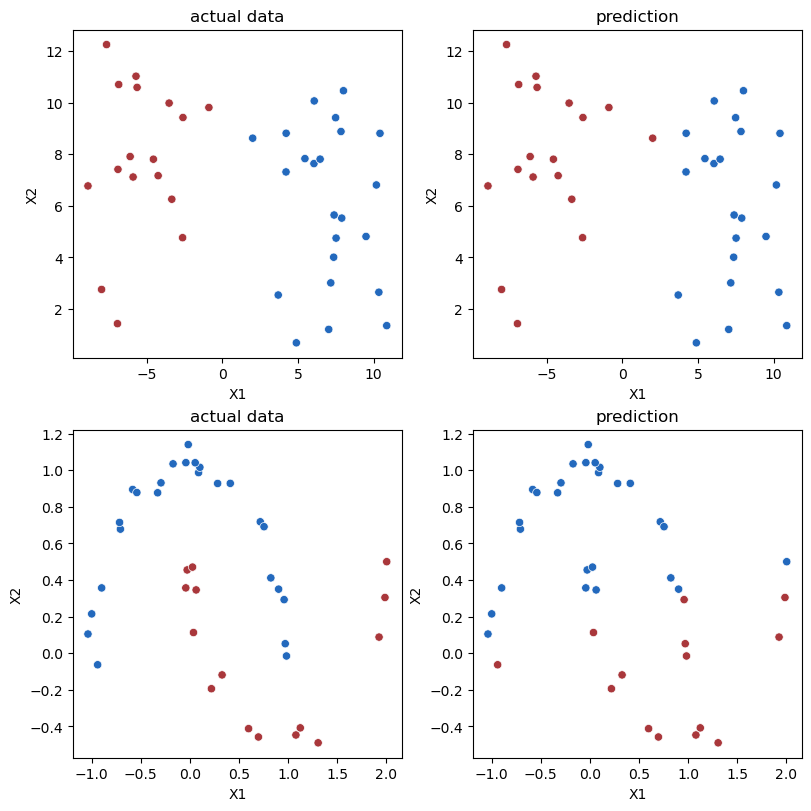

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), layout="constrained")
plot_helper(X_test_blobs, y_test_blobs, ax=ax[0, 0])
plot_helper(X_test_blobs, test_predictions_blobs, ax=ax[0, 1])
ax[0, 0].set_title("actual data")
ax[0, 0].set_xlabel("X1")
ax[0, 0].set_ylabel("X2")

ax[0, 1].set_title("prediction")
ax[0, 1].set_xlabel("X1")
ax[0, 1].set_ylabel("X2")

plot_helper(X_test_moons, y_test_moons, ax=ax[1, 0])
plot_helper(X_test_moons, test_predictions_moons, ax=ax[1, 1])
ax[1, 0].set_title("actual data")
ax[1, 0].set_xlabel("X1")
ax[1, 0].set_ylabel("X2")

ax[1, 1].set_title("prediction")
ax[1, 1].set_xlabel("X1")
ax[1, 1].set_ylabel("X2")
;